# Gözetimsiz Öğrenme

Etiketlenmemiş veriler ile tahmine dayalı bir makine öğrenmesi gerçekleştirilmek istendiğinde gözetimsiz makine öğrenmesi uygulamalarına başvurulur.

Verilerin etiketi, yani  ilgili satırları temsil eden ve tahmin edilmesi gereken gerçek bir değerin olmadığı zamanlarda gözetimsiz makine öğrenmesine başvurulabilir.

* K-Means
* Hiyerarşik Kümeleme Analizi
* Temel Bileşen Analizi

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır. 

Hiyerarşik olmayan küme analizidir. Kümelerin birbirine göre hetorejen kendi içlerinde homojen olmaları hedeflenir.  

* Küme sayısı belirlenir.
* Rastgele k merkez seçilir.
* Verilen küme merkezlerine olan uzaklıkları hesaplanır. İncelenen veri en yakın kümeye dahil edilir.
* İncelenen verilerin dahil edilmesiyle yeni küme merkezleri hesaplanır.
* Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index = df.iloc[:,0] # Eyalet isimleri değişkenlerini index olarak atamalayız

In [4]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [6]:
df = df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
df.index.name = None

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Murder değerinin ortalamadan daha büyük cinayet sayısına belirli bir eşik değeri belirlenerek ağırlıkların küme yapısı değiştirilebilir. (%75 den büyük olanlara 1 küçük olanlara 0)(min değerden küçük olanlara 1 büyük olanlara 10 ağırlığı verilebilir)

Standartlaşmadan kümeleme yapıldığında çok büyük varyanslar oluşur.

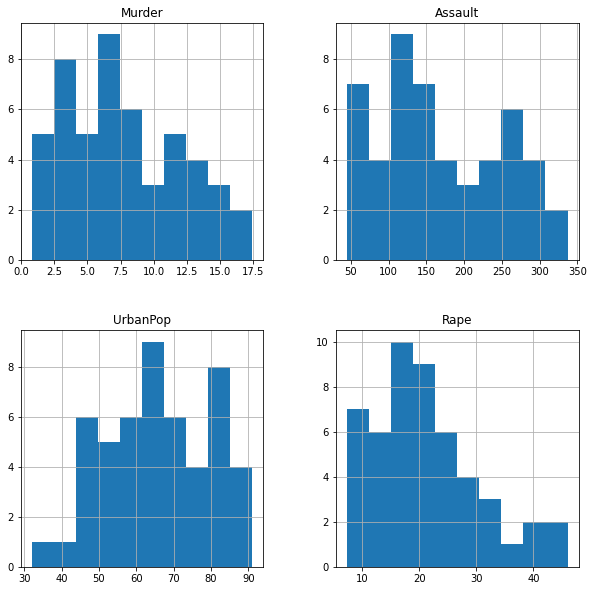

In [12]:
df.hist(figsize = (10,10));

## K-MEANS Model ve Görselleştirme

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [14]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\skumsar\appdata\local\anaconda3\envs\python_ml_udemy\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters a

In [15]:
k_fit = kmeans.fit(df)

In [16]:
k_fit.n_clusters

4

In [17]:
k_fit.cluster_centers_ # 4 sınıfında merkezi değerlerin uzaklıkları

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [18]:
k_fit.labels_ # Her bir gözlemin sınıfları

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

In [19]:
#görsellestirme

In [20]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [21]:
kumeler = k_fit.labels_

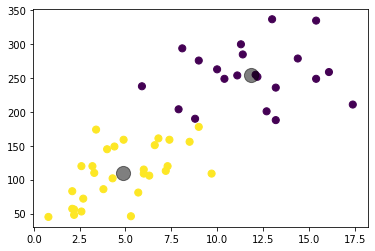

In [22]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

* 2 boyutlu gösterim için 2 değişken seçilir.
* 3 boyutlu gösterim için 3 değişken seçilir.

In [23]:
df.iloc[:,1]

Alabama           236
Alaska            263
Arizona           294
Arkansas          190
California        276
Colorado          204
Connecticut       110
Delaware          238
Florida           335
Georgia           211
Hawaii             46
Idaho             120
Illinois          249
Indiana           113
Iowa               56
Kansas            115
Kentucky          109
Louisiana         249
Maine              83
Maryland          300
Massachusetts     149
Michigan          255
Minnesota          72
Mississippi       259
Missouri          178
Montana           109
Nebraska          102
Nevada            252
New Hampshire      57
New Jersey        159
New Mexico        285
New York          254
North Carolina    337
North Dakota       45
Ohio              120
Oklahoma          151
Oregon            159
Pennsylvania      106
Rhode Island      174
South Carolina    279
South Dakota       86
Tennessee         188
Texas             201
Utah              120
Vermont            48
Virginia  

In [24]:
from mpl_toolkits.mplot3d import Axes3D

Çalışmazsa import mpl_toolkits

In [25]:
#!pip install --upgrade matplotlib
#import mpl_toolkits

In [26]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

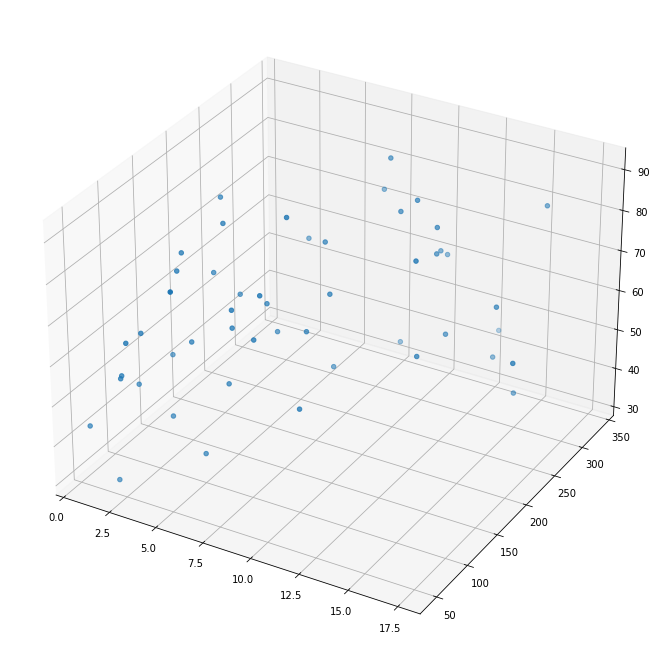

In [27]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

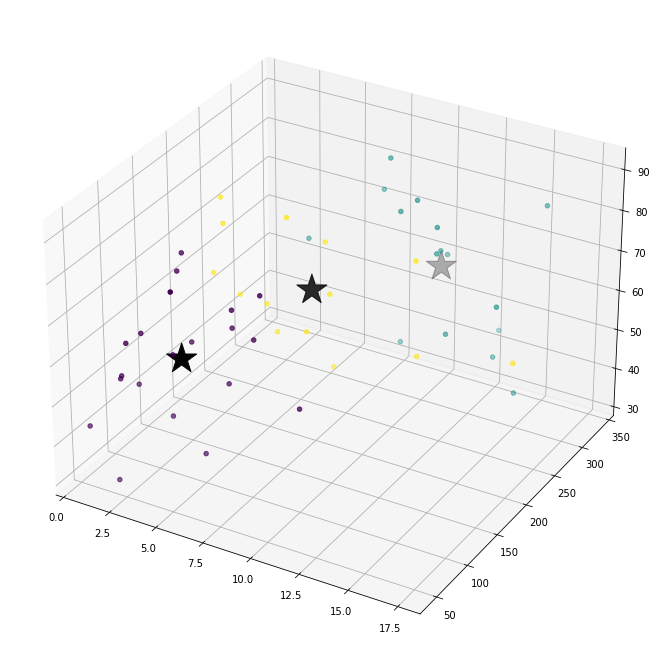

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', # merkezleri yıldız ile göster
           c='#050505', 
           s=1000);

Eğer elinizde 15-20 değişken var ve değişkenlerin bazı bilgi kayıplarını göze alırsak veri setine PCA uygulayıp indirgeme yapıldığında benzer bir görselleştirme işlemini gerçekleştirebilirsiniz.

Hangi eyaletin hangi cluster da olduğunu nasıl gösteririz?

In [29]:
#kumeler ve gözlem birimleri

In [30]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [31]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [32]:
df["kume_no"] = kumeler

In [33]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


Sıfır değerleri rahatsız ettiyse 1 ekleyebilirsin

In [34]:
df["kume_no"] = df["kume_no"] + 1

In [35]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


# Optimum Kume Sayısının Belirlenmesi

Öyle bir k değeri belirlemeliyim ki küme içi hataları minimum düzeyde tutmalıyız. Küme içi benzerliği max, kümeler arası benzerliği min düzeyde olmasını hedefler.

Elbow metodu; noktaların her K değerine göre küme merkezine uzaklıklarının karesi toplamı hesaplanmaktadır. Bu değerlere göre her K değeri için grafik çizilmektedir. Grafik üzerinde toplamlar arasındaki farkın azalmaya başladığı dirsek noktası en uygun K değeri olarak belirlenmektedir

In [36]:
#!pip install yellowbrick

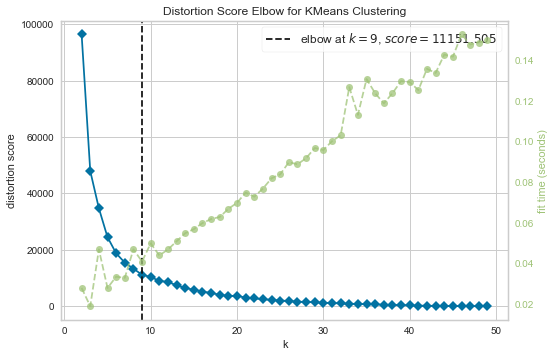

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df)
visualizer.poof()

In [38]:
kmeans = KMeans(n_clusters = 4) # optimum n_clusters sayısına 9 da verilebilir
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [39]:
# Segmentlere ayrılır
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [40]:
# kmeans = KMeans(n_clusters = 9)
# k_fit = kmeans.fit(df)
# kumeler = k_fit.labels_

In [41]:
# # Segmentlere ayrılır
# pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

# Hiyerarşik Kümeleme

Elimizde küme sayısı ile ilgili herhangi bir bilgi olduğunda hiyerarşik olmayan kümeleme yöntemleri kullanılabilir. K-means yöntemi, en çok olabilirlik yöntemi, fuzzy yöntemi gibi birçok hiyerarşik olmayan kümeleme yöntemi bulunur. Gözetimsiz öğrenmede hiyerarşik olmayan kümeleme yöntemlerinden K-means yöntemi kullanılır.

Hiyerarşik olmayan kümeleme yöntemlerinde sadece gözlemlerin kümelenmesidir. Gözlem birimlerini sanki değişkenlermiş, değişkenleri de gözlemlermiş gibi düşünebiliriz.

Baslangıçta gözlem sayısı kadar küme vardır.
* Adim 1: Veri setinde birbirine en yakin olan iki gözlem bulunur.
* Adim 2: Bu iki nokta bir araya getirilerek yeni bir gözlem olusturulur. Yani artik veri seti ilk birlesimdeki gözlemlerden olusmaktadir.
* Adim 3: Ayni islem tekrarlanarak kadar yukari dogru cikilir. Yani iki kümenin birlesiminden olusan bu yeni kümeler ayn sekilde birbirlerine benzerliklerine göre tekrar birlestirilir. Bu islem tüm gözlemler tek bir küme de toplanana kadar bu islemler tekrar edilir.

Birbirine yakin noktalar uzaklik ölçüleri kullanarak belirlenir. Öklit uzakligi, manhattan uzakligi, korelasyon vs

Başlangıçta 1 tane küme vardır, o da tüm veri setidir.

Adım 1: Tüm gözlemlerin bir arada olduğu küme iki alt kümeye ayrılır.

Adım 2: Oluşan yeni kümeler birbirlerine benzemeyen alt kümelere bölünür.

Adım 3: Aynı işlem gözlem sayısı kadar küme elde edilinceye kadar tekrar edilir.

* Hiyerarşik yöntemlerde küme sayısına dendrogram sonuçlarına bakılarak karar verilirken, hiyerarşik olmayan yöntemlerde küme sayısı uygulama yapılmadan önce belirlenir. 
* Hiyerarşik kümeleme yöntemlerinde veri seti gözlemler ya da değişkenler bazında kümeleme işlemine sokulabilirken hiyerarşik olmayan yöntemlerde sadece gözlemlerin kümelenmesi mümkündür. 
* Karar ağaçlarından farkı; karar ağaçlarında ayırma işlemi hedef değişkene göre yapılırken burada bağımlı değişken olmadığı için gözlemler bağımsız değişkenler üzerinden yapılan uzaklık hesaplarına göre kümelere ayrılır.

In [47]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [48]:
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [49]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [51]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

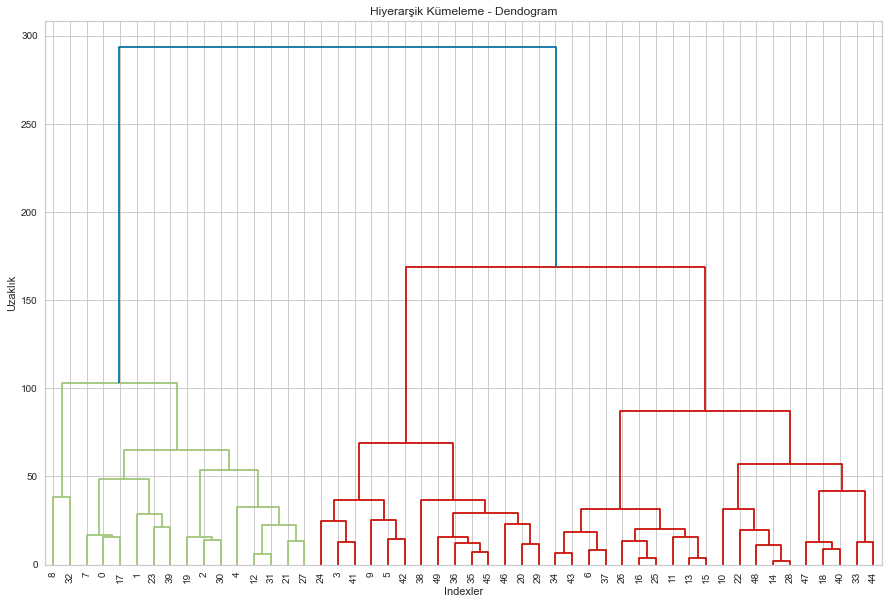

In [53]:
from scipy.cluster.hierarchy import dendrogram
# dendrogram işlemi
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
); # Çıktıyı ortadan kaldırmak için ";" kullan

Merge edilen cluster ları görmek için,
budama işlemini p = 4 seçerek 4 küme seçilir ve elemanlardaki veriler gözükmektedir.

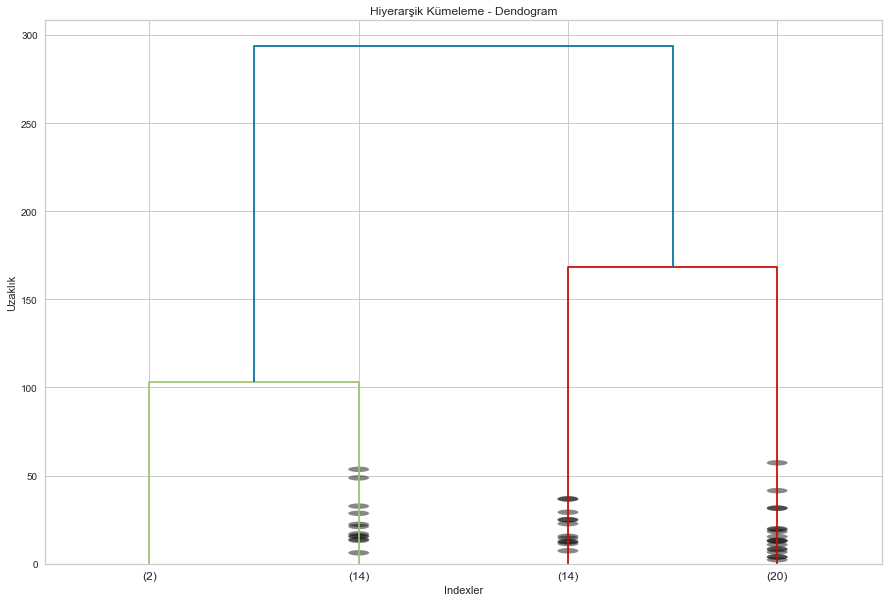

In [54]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

Veri setini iki kümeye ayırdık. 

## Optimum Küme Sayısı

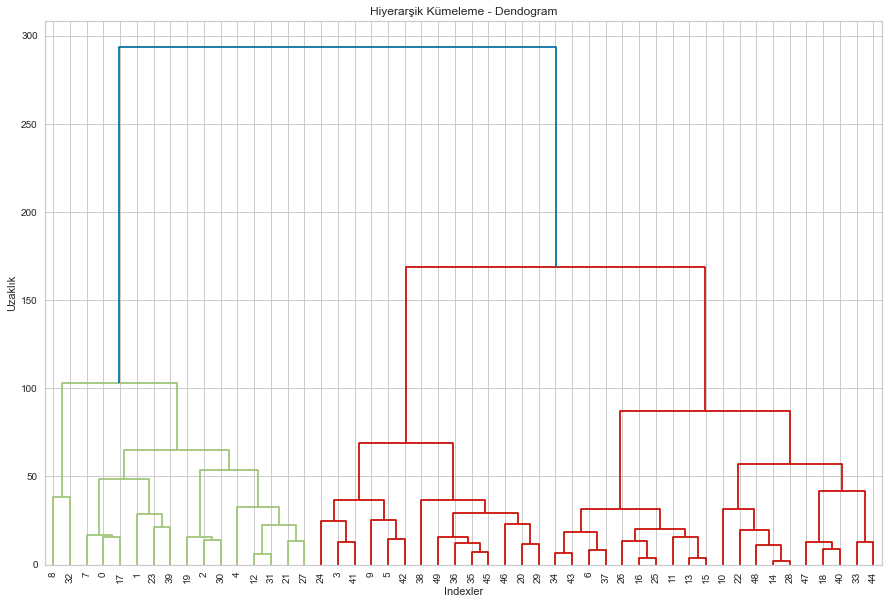

In [60]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10 # leaf nodeların isimlendirilmeleri görünür olması için büyüttük
);

In [58]:
?den

Type:        dict
String form: {'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [65.0, 65 <...>  'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0']}
Length:      5
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [59]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, # 4 küme
                                  affinity = "euclidean", 
                                  linkage = "ward") # birleştirici kümeleme
cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [62]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [63]:
df["kume_no"] = cluster.fit_predict(df)

In [64]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# PCA

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir.

Diğer bir ifade ile: küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.

Bilgi kaybı: veri setindeki toplam değişkenliktir.

Veri setindeki değişken sayısını daha az değişken ile özelliklerini korumasını sağlayarak indirgeme yapılır.

Korelasyonsuz, doğrusaldır. Varyanslara göre gruplandırılır.

In [70]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [71]:
from warnings import filterwarnings
filterwarnings('ignore')

In [72]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df) # df standartlaştırılır
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3) # veri setinde 4 değişken olduğu için 5 olmaz
pca_fit = pca.fit_transform(df)

In [74]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [75]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


4 değişkeni 3 bileşene indirgedik. Gerçek veri setini ne kadar temsil ettiğini öğrenmek için varyansına bakılır.

In [76]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [77]:
# bağımlı değişken olmadığı için kullanıcı etkileri daha etkilidir
# bileşen sayısını nasıl seçmeliyiz
pca = PCA().fit(df)

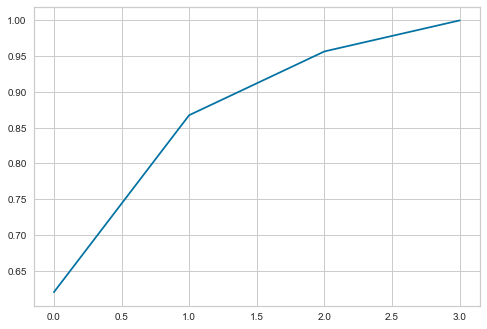

In [78]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# bileşen sayısına karar vermek için varyans bakılır

Veri setinin %95 ini 2 değişkenle açıklayabiliyorum.
Veri setinin tamamını 4 değişkenle açıklarız.

# Apriori

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

veriler = pd.read_csv('sepet.csv', header = None)

t = []
for i in range (0,7501):
    t.append([str(veriler.values[i,j]) for j in range (0,20)])

from apyori import apriori
kurallar = apriori(t,min_support=0.01, min_confidence=0.2, min_lift = 3, min_length=2)

print(list(kurallar))

[RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]), RelationRecord(items=frozenset({'herb & pepper', 'ground beef', 'nan'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper', 'nan'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)])]


elationRecord(items=frozenset({'herb & pepper', 'ground beef', 'nan}) verisini incelediğimizde 'herb & pepper' iki ürünü aldığımızda lift=3.2 değeriyle 3 kat bu iki ürünün alınması artar. 

In [6]:
type(kurallar) # apriori class ında nesne döndürdüğü için generator

generator

Big Data için her kütüphane paralelleştirilmez. Eclat küçük verilerde daha iyi sonuçlar verir.

# Eclat Algoritması

Equivalence Class Transformation

FP-Growth algoritması Knime da anlatılıyor.

* Apriori: Breadth First Search
* Eclat: Depth First Search